In [7]:
from collections import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model

# DATA CLEANING --same for all parts

file_path = "Top_1000_IMDb_movies_New_version.csv"
data = pd.read_csv(file_path, header=0)
clean_data = data.copy()
clean_data = clean_data.replace("#222", "72.5")

# convert format "II 2019" to "2019"
def convert_string(x):
    if x[0] == 'I':
        return x[-4:]
    else:
        return x
clean_data["Year of Release"] = clean_data["Year of Release"].apply(convert_string)

# convert votes to numbers
def convert_to_int(x):
    return int(x.replace(',', ''))
clean_data["Votes"] = clean_data["Votes"].apply(convert_to_int)

# calculate means
Wt_mean = clean_data["Watch Time"].mean()
Rating_mean = clean_data["Movie Rating"].mean()
score_mean = clean_data["Metascore of movie"].mean()
revenue_mean = clean_data["Gross"].apply(float).mean()
votes_mean = clean_data["Votes"].mean()

# Data filling with mean values
clean_data["Watch Time"] = clean_data["Watch Time"].fillna(Wt_mean)
clean_data["Movie Rating"] = clean_data["Movie Rating"].fillna(Rating_mean)
clean_data["Metascore of movie"] = clean_data["Metascore of movie"].fillna(score_mean)
clean_data["Gross"] = clean_data["Gross"].fillna(revenue_mean)
clean_data["Votes"] = clean_data["Votes"].fillna(votes_mean)


print("Shape before clean: ", data.shape)
print("Shape after clean: ", clean_data.shape)

# words and counts in each description
count = Counter()
desc_words = clean_data["Description"].str.split()
for i in desc_words:
    count.update(i)
desc_wc = clean_data["Description"].str.split().apply(len)

Shape before clean:  (1000, 9)
Shape after clean:  (1000, 9)


Text(0.5, 1.0, 'Gross Revenue vs. Watch Time')

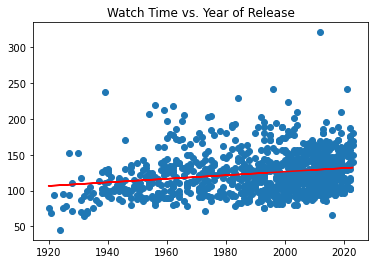

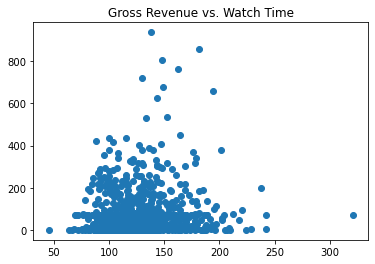

In [8]:
# III: Hypothesis Testing 

# Hypothesis 1) There is a relationship between a movies length and the year of release, 
# indicating that movies are converrging towards a length optimal for revenue generation. 
# I.E. Are movies getting longer/shorter than they used to be? Does this suggest that people like 
# movies to be a specific length, or that movies of that length tend to generate higher revenue?

# Make line of best fit for Watch time vs Release Year
# compare to Gross as a function of watch time
vals = clean_data["Year of Release"].apply(int)
x = clean_data["Year of Release"].apply(int).to_numpy()
y = clean_data["Watch Time"].to_numpy()
slope, intercept = np.polyfit(x, y, 1)

plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, slope*x + intercept, color = "Red")
plt.title("Watch Time vs. Year of Release")


x = clean_data["Watch Time"].to_numpy()
y = clean_data["Gross"].apply(float).to_numpy()
plt.figure()
plt.plot(x, y, 'o')
plt.title("Gross Revenue vs. Watch Time")

[ 1.         -0.05995249]
[1.         0.12648467]
[1.         0.10757363]
[1.         0.53336128]


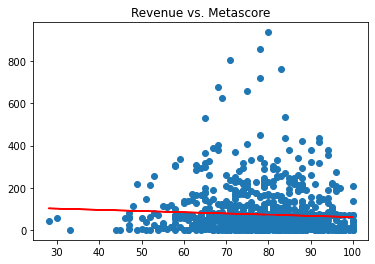

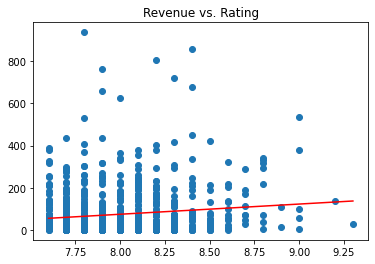

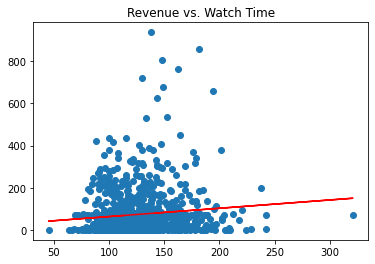

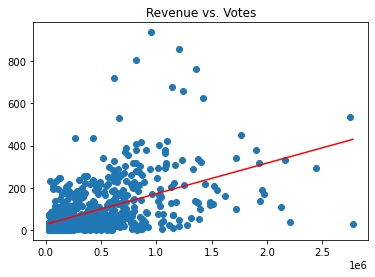

In [9]:
# Hypothesis 2) Votes (real popularity) are a better predictor of revenue generation for a given movie 
# than it's ratings/scores.  
# I.E. What factor(s) predicts revenue most strongly?  
lines = []
y = clean_data["Gross"].apply(float).to_numpy()
features = ["Metascore of movie", "Movie Rating", "Watch Time", "Votes"]
for x in features:
    xvar = clean_data[x].to_numpy()
    coef, inter = np.polyfit(xvar, y, 1)
    lines.append([coef, inter])

plt.figure()
x = clean_data[features[0]]
plt.plot(x, y, 'o')
plt.plot(x, lines[0][0]*x + lines[0][1], color = "Red")
plt.title("Revenue vs. Metascore")
print(np.corrcoef(x, y)[0])

plt.figure()
x = clean_data[features[1]]
plt.plot(x, y, 'o')
plt.plot(x, lines[1][0]*x + lines[1][1], color = "Red")
plt.title("Revenue vs. Rating")
print(np.corrcoef(x, y)[0])

plt.figure()
x = clean_data[features[2]]
plt.plot(x, y, 'o')
plt.plot(x, lines[2][0]*x + lines[2][1], color = "Red")
plt.title("Revenue vs. Watch Time")
print(np.corrcoef(x, y)[0])

plt.figure()
x = clean_data[features[3]]
plt.plot(x, y, 'o')
plt.plot(x, lines[3][0]*x + lines[3][1], color = "Red")
plt.title("Revenue vs. Votes")
print(np.corrcoef(x, y)[0])

[1.         0.09166584]
[1.         0.05037893]


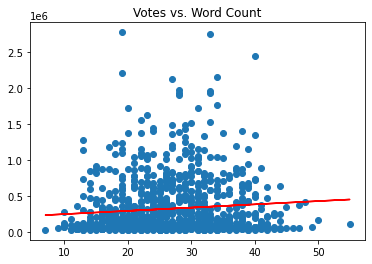

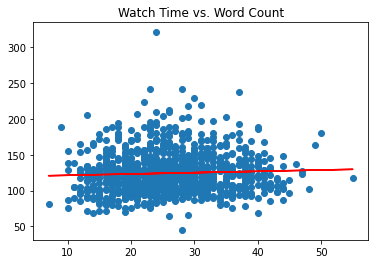

In [10]:
# Hypothesis 3) The length/average word count of descriptions and the popularity/votes for a movie 
# are positively correlated. 
# Extra Hypothesis: Watch time does not predict length of description (I was curious)  
# I.E. Does word count have anything to do with the popularity, or even length of a movie

# To test this I will use the parsed word counts for each movie and compare their correlation between the Votes 
# and Watch time of that movie.

lines = []
plt.figure()
x = desc_wc # word counts for all descriptions
y = clean_data["Votes"]
plt.plot(x, y, 'o')
coef, inter = np.polyfit(x, y, 1)
lines.append([coef, inter])
plt.plot(x, lines[0][0]*x + lines[0][1], color = "Red")
plt.title("Votes vs. Word Count")
print(np.corrcoef(x, y)[0])

plt.figure()
x = desc_wc # word counts for all descriptions
y = clean_data["Watch Time"]
plt.plot(x, y, 'o')
coef, inter = np.polyfit(x, y, 1)
lines.append([coef, inter])
plt.plot(x, lines[1][0]*x + lines[1][1], color = "Red")
plt.title("Watch Time vs. Word Count")
print(np.corrcoef(x, y)[0])

[1.         0.48381338]
[ 1.         -0.06333825]


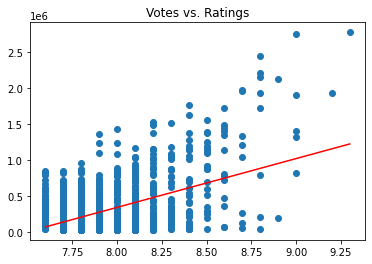

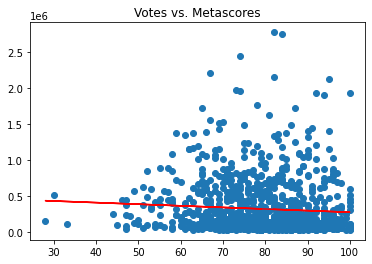

In [11]:
# Hypothesis 4) Movie ratings (by viewers) are more representative of the popularity of a movie (votes) 
# than the Metascore, implying that reviews by movie critics are not a good indicator of the success or 
# quality of that movie.

# To test this I will compare the correlation coefficients of Ratings by viewers and Metascores to the Votes 
# movies recieved.

lines = []
plt.figure()
x = clean_data["Movie Rating"]
y = clean_data["Votes"]
plt.plot(x, y, 'o')
coef, inter = np.polyfit(x, y, 1)
lines.append([coef, inter])
plt.plot(x, lines[0][0]*x + lines[0][1], color = "Red")
plt.title("Votes vs. Ratings")
print(np.corrcoef(x, y)[0])

plt.figure()
x = clean_data["Metascore of movie"]
y = clean_data["Votes"]
plt.plot(x, y, 'o')
coef, inter = np.polyfit(x, y, 1)
lines.append([coef, inter])
plt.plot(x, lines[1][0]*x + lines[1][1], color = "Red")
plt.title("Votes vs. Metascores")
print(np.corrcoef(x, y)[0])

In [12]:
# Hypothesis 5) Less than 10% of movies account for the majority of the votes given to any movie.
# I.E. The square root law holds for the popularity of movies in this dataset.

# To test this I counted the total votes among all movies and then determined what proportion of those 
# votes are held by the most popular movies in 3 categories: Top 10%, top 5%, and top 1%.
vals = []
total_votes = clean_data["Votes"].sum()
sorted_votes = clean_data["Votes"].sort_values(ascending=False)
proportions = {}

vals.append(sum(sorted_votes[:100]))
vals.append(sum(sorted_votes[:50]))
vals.append(sum(sorted_votes[:10]))

proportions["Top 10%"] = vals[0]/total_votes
proportions["Top 5%"] = vals[1]/total_votes
proportions["Top 1%"] = vals[2]/total_votes

print("Total Votes for all movies: ", total_votes)
print("Total votes by category [10%, 5%, 1%]: ", vals)
print("Proportions of votes given to Top movies: ")
print("%", round(proportions["Top 10%"] * 100, 2))
print("%", round(proportions["Top 5%"] * 100, 2))
print("%", round(proportions["Top 1%"] * 100, 2))

Total Votes for all movies:  319046868
Total votes by category [10%, 5%, 1%]:  [123189333, 76271295, 22279308]
Proportions of votes given to Top movies: 
% 38.61
% 23.91
% 6.98
